### Challenge where we will learn:

- At Hashtag, we always analyze our "Sales Funnel". For this, we track where the students came from through a code, like:
     - hashtag_site_org -> People who came from the Hashtag website
     - hashtag_yt_org -> People who came from Hashtag's Youtube
     - hashtag_ig_org -> People who came from Hashtag Instagram
     - hashtag_igfb_org -> People who came through Instagram or Facebook from Hashtag

Codes other than that are Hashtag ad codes.

- We want to analyze how many students came from ad and how many came "organic".
- What is the best "organic" source of students

Note: organic is everything that didn't come from ads.

In our system, we were able to export a txt with the information of the students, according to the file Students.txt<br>

- In the end, for training, let's write all these answers in a new txt file

In [35]:
import pandas as pd

students = pd.read_fwf('Alunos.txt')

students

,Lista de Clientes Hashtag
0,Clientes Totais\t500
1,"Email,*origemurl"
2,"""fulano1151@gmail.com,origemurl:nan;1095748386..."
3,"fulano1173@gmail.com,origemurl:nan"
4,"""fulano1169@gmail.com,origemurl:hashtag_yt_org..."
...,...
497,"""fulano1733@gmail.com,origemurl:hashtag_ig_org..."
498,"fulano1225@gmail.com,origemurl:nan"
499,"""fulano1191@gmail.com,origemurl:23845264791230..."
500,"""fulano1199@gmail.com,origemurl:hashtag_org_we..."


In [36]:
only_students = students[2:]

only_students

,Lista de Clientes Hashtag
2,"""fulano1151@gmail.com,origemurl:nan;1095748386..."
3,"fulano1173@gmail.com,origemurl:nan"
4,"""fulano1169@gmail.com,origemurl:hashtag_yt_org..."
5,"fulano1565@gmail.com,origemurl:nan"
6,"fulano1197@gmail.com,origemurl:nan"
...,...
497,"""fulano1733@gmail.com,origemurl:hashtag_ig_org..."
498,"fulano1225@gmail.com,origemurl:nan"
499,"""fulano1191@gmail.com,origemurl:23845264791230..."
500,"""fulano1199@gmail.com,origemurl:hashtag_org_we..."


In [51]:
site_org = 0
yt_org = 0
ig_org = 0
org = 0
ads = 0

for lab, row in only_students.iterrows():
     if '_org' in row['Lista de Clientes Hashtag']:
          org += 1
          if 'hashtag_site_org' in row['Lista de Clientes Hashtag']:
               site_org += 1
          if 'hashtag_yt_org' in row['Lista de Clientes Hashtag']:
               yt_org += 1
          if 'hashtag_ig_org' in row['Lista de Clientes Hashtag'] or 'hashtag_igfb_org' in row['Lista de Clientes Hashtag']:
               ig_org += 1
     else:
          ads += 1
     
with open('Indicators.txt', 'w') as indicators_file:
     indicators_file.write(f'Total Clients: 500\n')
     indicators_file.write(f'Ads Amount: {ads/500:.2%} with a total of {ads}\n')
     indicators_file.write(f'Organic Amount: {org/500:.2%} with a total of {org}\n')
     indicators_file.write(f'Youtube Organic Amount: {yt_org/500:.2%} with a total of {yt_org}\n')
     indicators_file.write(f'Instagram Organic Amount: {ig_org/500:.2%} with a total of {ig_org}\n')
     indicators_file.write(f'Website Organic Amount: {site_org/500:.2%} with a total of {site_org}\n')


Text(0, 0.5, 'quantity')

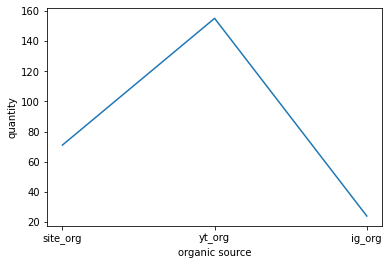

In [49]:
import matplotlib.pyplot as plt

x_orgs = ['site_org', 'yt_org', 'ig_org']
y_qt = [site_org, yt_org, ig_org]

plt.plot(x_orgs, y_qt)
plt.xlabel('organic source')
plt.ylabel('quantity')